In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns


In [4]:
agency =pd.read_csv('agency.txt')
agency.head()

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone,agency_fare_url,agency_email
0,DMRC,Delhi Metro Rail Corporation,http://www.delhimetrorail.com/,Asia/Kolkata,NaN,NaN,NaN,NaN


In [5]:
calendar=pd.read_csv('calendar.txt')
calendar.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,weekday,1,1,1,1,1,0,0,20190101,20251231
1,saturday,0,0,0,0,0,1,0,20190101,20251231
2,sunday,0,0,0,0,0,0,1,20190101,20251231


In [6]:
route=pd.read_csv('routes.txt')
route.head()

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color,route_sort_order,continuous_pickup,continuous_drop_off
0,33,NaN,R_SP_R,RAPID_Phase 3 (Rapid Metro) to Sector 55-56 (R...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
1,31,NaN,G_DD_R,GRAY_Dhansa Bus Stand to Dwarka,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2,29,NaN,P_MS_R,PINK_Shiv Vihar to Majlis Park,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
3,12,NaN,M_JB,MAGENTA_Janak Puri West to Botanical Garden,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
4,11,NaN,P_MS,PINK_Majlis Park to Shiv Vihar,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
stop_time=pd.read_csv('stop_times.txt')
stop_time.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,continuous_pickup,continuous_drop_off
0,0,05:28:08,05:28:28,21,0,NaN,0,0,0.000,1,NaN,NaN
1,0,05:30:58,05:31:18,20,1,NaN,0,0,1202.405,1,NaN,NaN
2,0,05:33:28,05:33:48,19,2,NaN,0,0,2480.750,1,NaN,NaN
3,0,05:35:33,05:35:53,18,3,NaN,0,0,3314.936,1,NaN,NaN
4,0,05:37:53,05:38:13,17,4,NaN,0,0,4300.216,1,NaN,NaN


In [8]:
shapes=pd.read_csv('shapes.txt')
shapes.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,shp_1_2,28.615887,77.022461,1,0.000
1,shp_1_2,28.616341,77.022499,2,50.510
2,shp_1_2,28.617985,77.022453,3,233.586
3,shp_1_2,28.618252,77.022453,4,263.487
4,shp_1_2,28.618425,77.022438,5,282.857


In [9]:
stops=pd.read_csv('stops.txt')
stops.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon
0,1,NaN,Dilshad Garden,NaN,28.675991,77.321495
1,2,NaN,Jhilmil,NaN,28.675648,77.312393
2,3,NaN,Mansrover park,NaN,28.675352,77.301178
3,4,NaN,Shahdara,NaN,28.673531,77.287270
4,5,NaN,Welcome,NaN,28.671986,77.277931


In [10]:
trips=pd.read_csv('trips.txt')
trips.head()

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed
0,0,weekday,0,NaN,NaN,NaN,NaN,shp_1_30,0,0
1,0,weekday,1,NaN,NaN,NaN,NaN,shp_1_30,0,0
2,0,weekday,10,NaN,NaN,NaN,NaN,shp_1_30,0,0
3,0,weekday,100,NaN,NaN,NaN,NaN,shp_1_30,0,0
4,2,weekday,1000,NaN,NaN,NaN,NaN,shp_1_13,0,0


In [11]:
data_overview = {
    'agency': agency.head(),
    'calendar': calendar.head(),
    'route': route.head(),
    'stop_time': stop_time.head(),
    'shapes': shapes.head(),
    'stops': stops.head(),
    'trips': trips.head()
}

data_overview

{'agency':   agency_id                   agency_name                      agency_url  \
 0      DMRC  Delhi Metro Rail Corporation  http://www.delhimetrorail.com/   
 
   agency_timezone  agency_lang  agency_phone  agency_fare_url  agency_email  
 0    Asia/Kolkata          NaN           NaN              NaN           NaN  ,
 'calendar':   service_id  monday  tuesday  wednesday  thursday  friday  saturday  sunday  \
 0    weekday       1        1          1         1       1         0       0   
 1   saturday       0        0          0         0       0         1       0   
 2     sunday       0        0          0         0       0         0       1   
 
    start_date  end_date  
 0    20190101  20251231  
 1    20190101  20251231  
 2    20190101  20251231  ,
 'route':    route_id  agency_id route_short_name  \
 0        33        NaN           R_SP_R   
 1        31        NaN           G_DD_R   
 2        29        NaN           P_MS_R   
 3        12        NaN             M_JB 

# Net work analysis

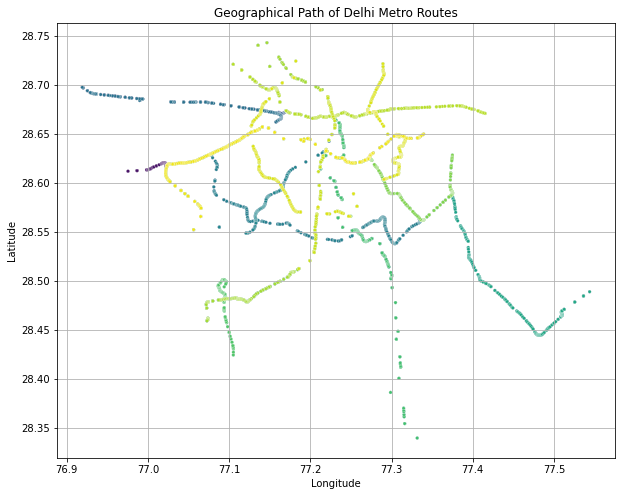

In [12]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='shape_pt_lon', y='shape_pt_lat', hue='shape_id', data=shapes, palette='viridis', s=10, legend=None)
plt.title('Geographical Path of Delhi Metro Routes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# I will examine the frequency and schedulling of trip across different days of the week by analyzing the celender and trip data

#Merge trip with calendar to include the day of operation information

In [13]:
trips_calender=pd.merge(trips,calendar, on='service_id', how='left')
trips_calender.head(5)


,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,0,weekday,0,NaN,NaN,NaN,NaN,shp_1_30,0,0,1,1,1,1,1,0,0,20190101,20251231
1,0,weekday,1,NaN,NaN,NaN,NaN,shp_1_30,0,0,1,1,1,1,1,0,0,20190101,20251231
2,0,weekday,10,NaN,NaN,NaN,NaN,shp_1_30,0,0,1,1,1,1,1,0,0,20190101,20251231
3,0,weekday,100,NaN,NaN,NaN,NaN,shp_1_30,0,0,1,1,1,1,1,0,0,20190101,20251231
4,2,weekday,1000,NaN,NaN,NaN,NaN,shp_1_13,0,0,1,1,1,1,1,0,0,20190101,20251231


#count the number of trips per day of the week

In [14]:
trip_counts=trips_calender[['monday','tuesday','wednesday','thursday','friday','saturday','sunday']].sum()
trip_counts

monday       5379
tuesday      5379
wednesday    5379
thursday     5379
friday       5379
saturday       59
sunday          0
dtype: int64

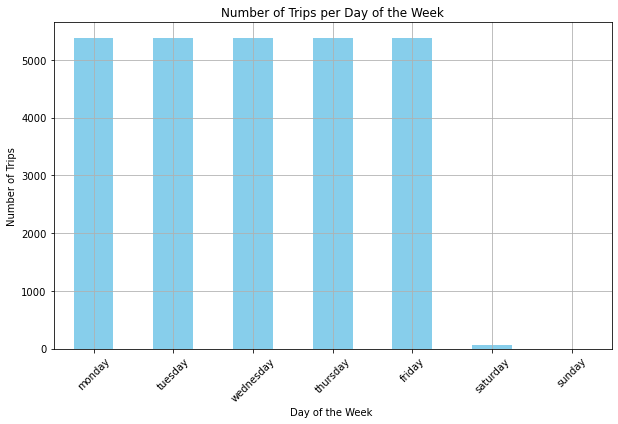

In [15]:
#plotting
plt.figure(figsize=(10,6))
trip_counts.plot(kind='bar',color='skyblue')
plt.title('Number of Trips per Day of the Week')
plt.xlabel('Day of the Week ')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

To further analyze the connectivity and effectiveness of the route strategy i will analyze the distrubution and connectivity of stops

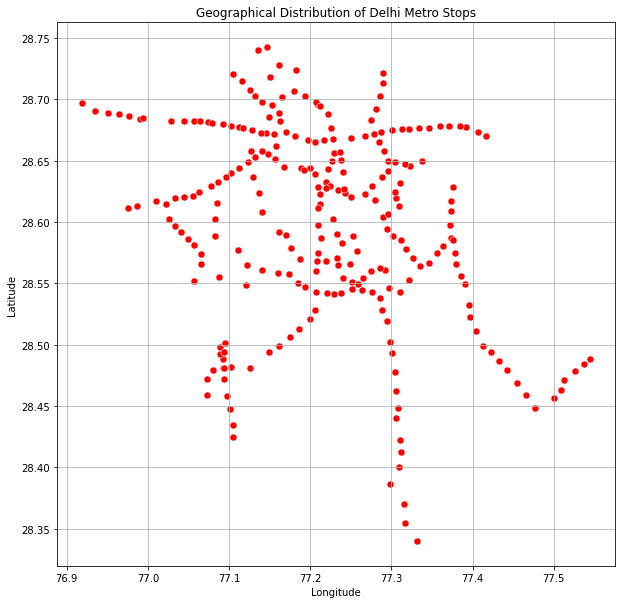

In [16]:
#plotting the locations
plt.figure(figsize=(10,10))
sns.scatterplot(x='stop_lon',y='stop_lat',data=stops,color='red',s=50,marker='o')
plt.title('Geographical Distribution of Delhi Metro Stops')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# let's analysis how many routes pass through each stop which cah highlight key transfer points and central hubs within the Delhi Metro network

In [17]:
# merge stops with stop_times to link each stop with trips and the merge within trips to get route information

In [18]:
stops_with_routes=pd.merge(pd.merge(stop_time,trips,on='trip_id'),route,on='route_id')

In [19]:
#count how many unique routes pass through each stop

In [20]:
stop_route_counts=stops_with_routes.groupby('stop_id')['route_id'].nunique().reset_index()
stop_route_counts=stop_route_counts.rename(columns={'route_id':'number_of_routes'})


In [21]:
#merge this with stops to get the names and location for plotting

In [22]:
stop_route_counts = pd.merge(stop_route_counts, stops, on='stop_id')


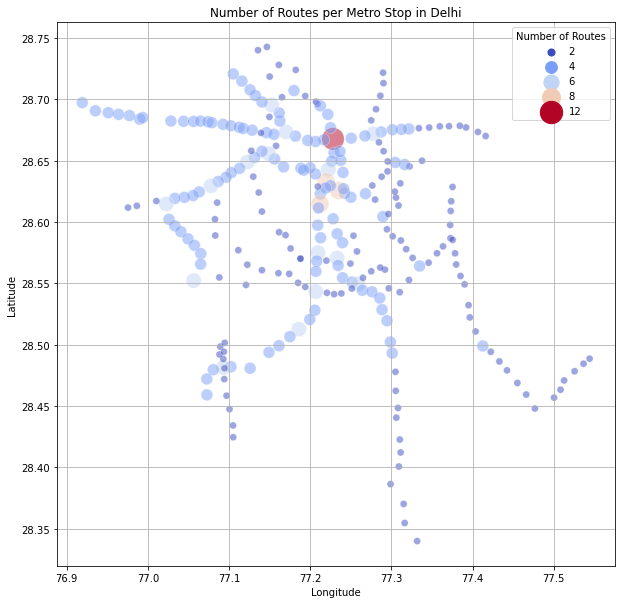

In [23]:
# plot the number of routes per stop
plt.figure(figsize=(10, 10))
sns.scatterplot(x='stop_lon', y='stop_lat', size='number_of_routes', hue='number_of_routes',
                sizes=(50, 500), alpha=0.5, palette='coolwarm', data=stop_route_counts)
plt.title('Number of Routes per Metro Stop in Delhi')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Number of Routes')
plt.grid(True)
plt.show()

''The scatter plot above represents the number of routes that pass through each Delhi Metro stop. Stops are visualized in different colours and sizes based on the number of routes they connect, providing insights into the complexity of the network at various locations. Key observations are:

Hubs and Transfer Points: Larger circles (in warmer colours) indicate stops where multiple routes intersect. These stops serve as major transfer points within the network, facilitating easier cross-city travel for passengers.
Distribution: Stops with fewer routes, shown in cooler colours and smaller sizes, tend to be more peripheral or on less busy lines. The central areas and more populated zones have stops with greater connectivity.''

'''Next, let’s analyze the service frequency by examining the timing intervals between trips during different parts of the day. It will help us understand peak and off-peak operational strategies, which are crucial for managing commuter flow efficiently. Let’s calculate and visualize these intervals:'''

## converting stop_times 'arrival_time' from string to datetime.time for easier manipulation

In [31]:
import datetime as dt

# function to convert time string to datetime.time
def convert_to_time(time_str):
    try:
        return dt.datetime.strptime(time_str, '%H:%M:%S').time()
    except ValueError:
        # Handle cases where the hour might be greater than 23 (e.g., 24:00:00 or 25:00:00)
        hour, minute, second = map(int, time_str.split(':'))
        return dt.time(hour % 24, minute, second)

stop_time['arrival_time_dt'] = stop_time['arrival_time'].apply(convert_to_time)


In [34]:
# calculate the difference in arrival times for subsequent trips at each stop
stop_time_sorted = stop_time.sort_values(by=['stop_id', 'arrival_time_dt'])
stop_time_sorted['next_arrival_time'] = stop_time_sorted.groupby('stop_id')['arrival_time_dt'].shift(-1)


In [36]:
# function to calculate the difference in minutes between two times
def time_difference(time1, time2):
    if pd.isna(time1) or pd.isna(time2):
        return None
    full_date_time1 = dt.datetime.combine(dt.date.today(), time1)
    full_date_time2 = dt.datetime.combine(dt.date.today(), time2)
    return (full_date_time2 - full_date_time1).seconds / 60

stop_time_sorted['interval_minutes'] = stop_time_sorted.apply(lambda row: time_difference(row['arrival_time_dt'], row['next_arrival_time']), axis=1)

# drop NaN values from intervals (last trip of the day)
stop_time_intervals = stop_time_sorted.dropna(subset=['interval_minutes'])

C:\Users\Pavan\AppData\Local\Temp/ipykernel_17632/679400613.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_time_intervals['part_of_day'] = stop_time_intervals['arrival_time_dt'].apply(part_of_day)


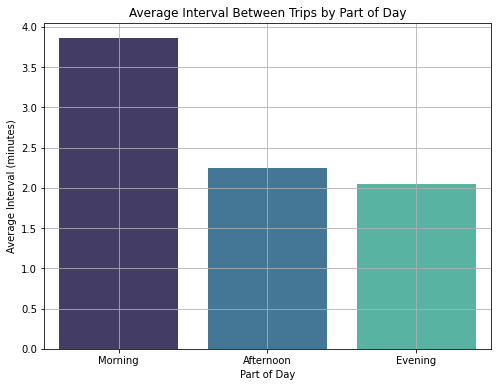

In [38]:
# average intervals by time of day (morning, afternoon, evening)
def part_of_day(time):
    if time < dt.time(12, 0):
        return 'Morning'
    elif time < dt.time(17, 0):
        return 'Afternoon'
    else:
        return 'Evening'

stop_time_intervals['part_of_day'] = stop_time_intervals['arrival_time_dt'].apply(part_of_day)
average_intervals = stop_time_intervals.groupby('part_of_day')['interval_minutes'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='part_of_day', y='interval_minutes', data=average_intervals, order=['Morning', 'Afternoon', 'Evening'], palette='mako')
plt.title('Average Interval Between Trips by Part of Day')
plt.xlabel('Part of Day')
plt.ylabel('Average Interval (minutes)')
plt.grid(True)
plt.show()

The bar chart above displays the average interval between trips on the Delhi Metro during different parts of the day: morning, afternoon, and evening. This data provides insight into the service frequency and how it is adjusted based on the expected demand throughout the day. Key findings are:

Morning: Shorter intervals between trips are observed in the morning hours, which likely corresponds to the morning rush hour when commuters are heading to work or school.
Afternoon: The intervals increase slightly during the afternoon, which may indicate a reduction in demand after the morning peak.
Evening: In the evening, intervals decrease again, likely to accommodate the evening rush hour as people return home.

Now, let’s calculate the number of trips and the available capacity per time interval. It will give us a basic understanding of how service levels vary throughout the day. We’ll classify the intervals as:

# Early Morning: Before 6 AM
#Morning Peak: 6 AM to 10 AM
#Midday: 10 AM to 4 PM
#Evening Peak: 4 PM to 8 PM
#Late Evening: After 8 PM

C:\Users\Pavan\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


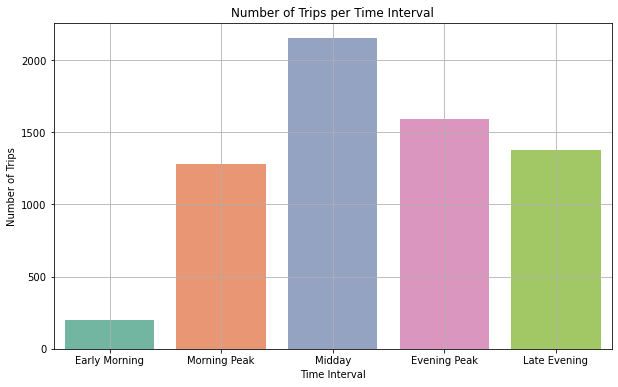

In [39]:
# define time intervals for classification
def classify_time_interval(time):
    if time < dt.time(6, 0):
        return 'Early Morning'
    elif time < dt.time(10, 0):
        return 'Morning Peak'
    elif time < dt.time(16, 0):
        return 'Midday'
    elif time < dt.time(20, 0):
        return 'Evening Peak'
    else:
        return 'Late Evening'

# apply time interval classification
stop_time['time_interval'] = stop_time['arrival_time_dt'].apply(classify_time_interval)

# count the number of trips per time interval
trips_per_interval = stop_time.groupby('time_interval')['trip_id'].nunique().reset_index()
trips_per_interval = trips_per_interval.rename(columns={'trip_id': 'number_of_trips'})

# sorting the dataframe
ordered_intervals = ['Early Morning', 'Morning Peak', 'Midday', 'Evening Peak', 'Late Evening']
trips_per_interval['time_interval'] = pd.Categorical(trips_per_interval['time_interval'], categories=ordered_intervals, ordered=True)
trips_per_interval = trips_per_interval.sort_values('time_interval')

# plotting the number of trips per time interval
plt.figure(figsize=(10, 6))
sns.barplot(x='time_interval', y='number_of_trips', data=trips_per_interval, palette='Set2')
plt.title('Number of Trips per Time Interval')
plt.xlabel('Time Interval')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

Early Morning: There is a relatively low number of trips, indicating less demand or fewer scheduled services during these hours.
Morning Peak: There is a significant increase in the number of trips compared to the early morning, likely due to morning commute hours as people travel to work or school.
Midday: The number of trips remains high, perhaps sustaining the morning rush or due to other midday travel needs.
Evening Peak: This period sees a slight decrease compared to midday but remains one of the busier times, probably reflecting the evening commute.
Late Evening: The number of trips drops again, but remains higher than in the early morning, likely catering to people returning home late or involved in evening activities.

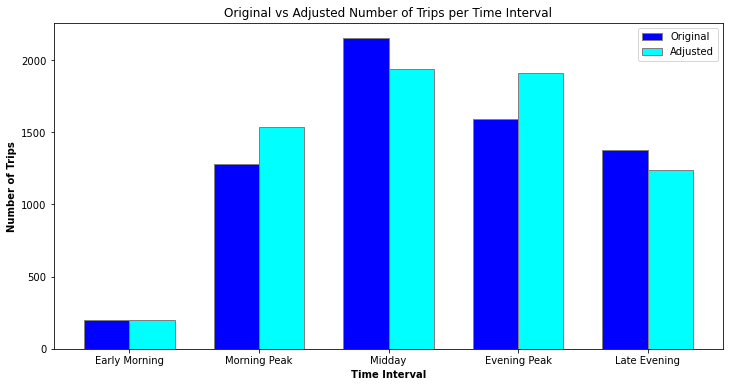

In [40]:
# adjusting frequencies based on hypothetical scenario
adjusted_trips_per_interval = trips_per_interval.copy()
adjustment_factors = {'Morning Peak': 1.20, 'Evening Peak': 1.20, 'Midday': 0.90, 'Early Morning': 1.0, 'Late Evening': 0.90}

# apply the adjustments
adjusted_trips_per_interval['adjusted_number_of_trips'] = adjusted_trips_per_interval.apply(
    lambda row: int(row['number_of_trips'] * adjustment_factors[row['time_interval']]), axis=1)

# plotting original vs adjusted number of trips per time interval
plt.figure(figsize=(12, 6))
bar_width = 0.35
r1 = range(len(adjusted_trips_per_interval))
r2 = [x + bar_width for x in r1]
plt.bar(r1, adjusted_trips_per_interval['number_of_trips'], color='blue', width=bar_width, edgecolor='grey', label='Original')
plt.bar(r2, adjusted_trips_per_interval['adjusted_number_of_trips'], color='cyan', width=bar_width, edgecolor='grey', label='Adjusted')

plt.xlabel('Time Interval', fontweight='bold')
plt.ylabel('Number of Trips', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(adjusted_trips_per_interval))], adjusted_trips_per_interval['time_interval'])
plt.title('Original vs Adjusted Number of Trips per Time Interval')
plt.legend()

plt.show()

#The bar chart illustrates the original versus adjusted number of trips per time interval for the Delhi Metro, based on our hypothetical adjustments to better align service levels with inferred demand: